<h1><center><font size="6"> Trabalho - Estatística Descritiva de Dados
 </font></center></h1>



### <center>Aluno: Fernando Baptistella de Lima (limabfernando@gmail.com)
#### <center>Curso: Análise e Engenharia de Dados - Cesar School/Cin UFPE
#### <center>Professor: Tsang Ing Ren - CIn/UFPE





## <a id='0'>Conteúdo</a>

- <a href='#1'>Introdução</a>  
- <a href='#2'>Parte I</a>  
    - <a href='#21'>Importando bibliotecas úteis</a>  
    - <a href='#22'>Análise Exploratória dos Dados</a>   
     - <a href='#221'>Selecionando a base</a>   
         - <a href='#2211'>Detalhes das colunas</a> 
         - <a href='#2212'>Infomações das colunas</a>   
     - <a href='#222'>Definindo as variáveis</a>     
    - <a href='#23'>Limpeza e Enriquecimento</a>  
     - <a href='#231'>Removendo dados duplicados</a> 
     - <a href='#232'>Removendo espaços em branco</a> 
     - <a href='#233'>Adicionando novas colunas</a>   
    - <a href='#24'>Amostras</a>   
        - <a href='#241'>Amostragem simples - sem reposicao</a>   
        - <a href='#242'>Amostragem simples - com reposicao</a> 
        - <a href='#243'>Amostragem sistemática</a> 
        - <a href='#244'>Amostragem estratificada</a> 
    - <a href='#25'>Explorando e visualizando os dados</a>
         - <a href='#251'>Análise univariada</a>   
         - <a href='#252'>Análise bivariada</a>   
         - <a href='#253'>Análise multivariada</a>   
    - <a href='#26'>Analisando os conjuntos de dados</a>  
- <a href='#3'>Parte II</a>  
    - <a href='#31'>1 Experimento</a>  
    - <a href='#32'>2 Experimento</a>  
    - <a href='#33'>3 Experimento</a>  
    
- <a href='#4'>Parte III</a>  
    - <a href='#41'>Comparando escores-z de conjuntos de dados diferentes</a>  
    - <a href='#42'>Margem de erro</a>  
    - <a href='#43'>Construindo um intervalo de confiança</a>
    - <a href='#44'>Hypotheses Test</a>



## <a id='1'>Introdução</a>  

Notebook criado para a disciplina de Estatística Descritiva de Dados tem como intuito realizar uma análise estatística utilizando técnicas para descrever e sumarizar seus respectivos dados sobre uma determinada população.

Desta forma, será utilizado a base de dados _Adult Data Set_ disponibilizado no site UCI Machine Learning Repository. O conjunto de dados foram extraidos por Barry Becker em 1994 e possui 14 colunas com 48842 instancias.

Os dados estão disponíveis no link a seguir: 

Link: https://archive.ics.uci.edu/ml/datasets/Adult

Para este trabalho foram definidos os seguintes passos: 
- Parte 1:
 1. Selecionar uma base de dados.
 2. Identificar as variáveis (Quantitativas e Qualitativas)
 3. Amostragem
 4. Limpeza e Enriquecimento 
 5. Estatísticas
     - Média, Mediana, Moda
     - Variança, Desvio Padrão, Coeficiente de Variância
     - Max, Min, Amplitude
 6. Gráficos
 7. Análise
- Parte 2:
    1. Utilizar o classificador Naive Bayes
    2. Realizar diferentes experimentos como o classificador
- Parte 3:
    1. Intervalos de Confiança e Distribuições
    2. Teste de Significância (Hipótese)

#### Agenda
- Parte 1:
    - 11/01/2020 - Início do trabalho
    - 19/01/2020 - Deadline
    
- Parte 2:
    - 25/01/2020 - Início do trabalho
    - 01/02/2020 - Deadline
    
- Parte 3:
    - 25/01/2020 - Início do trabalho
    - 01/02/2020 - Deadline

# <a id='2'>Part I</a>   

## <a id='21'>Importando bibliotecas úteis</a>  
Carregando pacotes  usados além do Python base.

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import scipy.stats as stats
import scipy.stats as st

## <a id='22'>Análise Exploratória dos Dados</a>   
Nesta seção será utilizado métodos para realizar uma análise exploratória descritiva do conjunto de dados. Sendo necessário carregar e preparar a base de dados, conforme poderá ser vistos nos itens a seguir:


### <a id='221'> Selecionando a Base</a>   

In [2]:
df = pd.read_csv('adult.data')
df = pd.DataFrame(data=df)
df

dataset = pd.read_csv("adult.data", 
                  sep=',', names=['age', 
                                     'workclass',
                                     'fnlwgt', 
                                     'education', 
                                     'education-num', 
                                     'marital-status', 
                                     'occupation',
                                     'relationship',
                                     'race',
                                     'sex',
                                     'capital-gain',
                                     'capital-loss',
                                     'hours-per-week',
                                     'native-country',
                                     'income'])

In [3]:
# Listar as três primeiras linhas do conjunto de dados
dataset.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [4]:
# Exibir informações sobre as colunas
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


####  <a id='2211'>Detalhes das colunas</a>   

A seguir será mostrado as colunas com seu tipo e descrição, respectivamente.

In [5]:
# Listagem das colunas
dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

####  <a id='2112'>Infomações das colunas</a>   
Será listado a seguir todas a colunas disponíveis na base com seus respectivos valores.


- age: contínuo [0-100]. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: contínuo. 
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: contínuo. 
- capital-loss: contínuo. 
- hours-per-week: contínuo. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Conforme podemos observar existe tanto quanto variáveis categóricas e numéricas no conjunto de dados.

In [6]:
categorical = [var for var in dataset.columns if dataset[var].dtype=='O']

print('Existem {} variáveis categóricas\n'.format(len(categorical)))

print('As variáveis categóricas são:\n\n', categorical)

Existem 9 variáveis categóricas

As variáveis categóricas são:

 ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


In [7]:
categorical = [var for var in dataset.columns if dataset[var].dtype=='int64']

print('Existem {} variáveis numéricas \n'.format(len(categorical)))

print('As variáveis numéricas são:\n\n', categorical)

Existem 6 variáveis numéricas 

As variáveis numéricas são:

 ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


Exibindo o sumário das estatísticas descritivas dos dados.

In [8]:
dataset.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
# Utilizando a função shape para exibir a dimensão do dataframe
dataset.shape

(32561, 15)

Como podemos observar este conjunto de dados possui 32561 instâncias e 15 atributos.

### <a id='222'> Definindo as variáveis</a>   
Verificando o tipo de dado para cada coluna no conjunto de dados

In [10]:
dataset.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

Como podemos observar alguns dados estão com o tipo object, desta forma, será necessário converter esses dados para o tipo correto.

In [11]:
# converter object para o tipo category
dataset['workclass'] = dataset['workclass'].astype('category')
dataset['education'] = dataset['education'].astype('category')
dataset['marital-status'] = dataset['marital-status'].astype('category')
dataset['occupation'] = dataset['occupation'].astype('category')
dataset['relationship'] = dataset['relationship'].astype('category')
dataset['race'] = dataset['race'].astype('category')
dataset['sex'] = dataset['sex'].astype('category')
dataset['native-country'] = dataset['native-country'].astype('category')
dataset['income'] = dataset['income'].astype('category')

In [12]:
# Verificando os tipos de dados após a conversão 
dataset.dtypes

age                  int64
workclass         category
fnlwgt               int64
education         category
education-num        int64
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country    category
income            category
dtype: object

## <a id='23'>Limpeza e Enriquecimento</a>   

Nesta seção será realizado um processo para limpar a base de dados, isto é, remover dados que estão duplicados, e dessa forma, tornar mais legível e confiável os dados para que possa ser realizada as análises. Além disso, será adicionado novas colunas no conjunto como uma forma de obter um maior enriquecimento da base de dados.

### <a id='231'>Removendo dados duplicados</a>   

Verificando se o conjunto de dados possuem dados faltantes.

In [13]:
missing_values = dataset.isnull().sum()
missing_values = pd.DataFrame(missing_values, columns=['Missing Values'])

column_data_types = dataset.dtypes
column_data_types  = pd.DataFrame(column_data_types, columns=['Data Types'])
missing_values.join(column_data_types)

,Missing Values,Data Types
age,0,int64
workclass,0,category
fnlwgt,0,int64
education,0,category
education-num,0,int64
marital-status,0,category
occupation,0,category
relationship,0,category
race,0,category
sex,0,category


Verificado se existem dados duplicados.

In [14]:
print('Dados duplicados: ', dataset.duplicated(keep=False).sum())
print('Existe dados duplicados: ', any(dataset.duplicated()))

Dados duplicados:  47
Existe dados duplicados:  True


In [15]:
dataset = dataset.drop_duplicates()
print('Dados duplicados: ', dataset.duplicated().sum())
print('Existe dados duplicados: ', any(dataset.duplicated()))

Dados duplicados:  0
Existe dados duplicados:  False


A seguir será exibidos todos os valores únicos de cada coluna para verificar se existe algum valor que não esteja no padrão correto utilizado na base.

In [16]:
print('-------------------------------------------------------------------------------------------------------- ')
print('age : ', dataset['age'].unique())
print('-------------------------------------------------------------------------------------------------------- ')
print('workclass : ', dataset['workclass'].unique())
print('-------------------------------------------------------------------------------------------------------- ')
print('education : ', dataset['education'].unique())
print('-------------------------------------------------------------------------------------------------------- ')
print('marital-status : ', dataset['marital-status'].unique())
print('-------------------------------------------------------------------------------------------------------- ')
print('occupation : ', dataset['occupation'].unique())
print('-------------------------------------------------------------------------------------------------------- ')
print('relationship : ', dataset['relationship'].unique())
print('-------------------------------------------------------------------------------------------------------- ')
print('race : ', dataset['race'].unique())
print('-------------------------------------------------------------------------------------------------------- ')
print('sex : ', dataset['sex'].unique())
print('-------------------------------------------------------------------------------------------------------- ')
print('native-country : ', dataset['native-country'].unique())
print('-------------------------------------------------------------------------------------------------------- ')
print('income : ', dataset['income'].unique())
print('-------------------------------------------------------------------------------------------------------- ')

-------------------------------------------------------------------------------------------------------- 
age :  [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
-------------------------------------------------------------------------------------------------------- 
workclass :  [State-gov, Self-emp-not-inc, Private, Federal-gov, Local-gov, ?, Self-emp-inc, Without-pay, Never-worked]
Categories (9, object): [State-gov, Self-emp-not-inc, Private, Federal-gov, ..., ?, Self-emp-inc, Without-pay, Never-worked]
-------------------------------------------------------------------------------------------------------- 
education :  [Bachelors, HS-grad, 11th, Masters, 9th, ..., 5th-6th, 10th, 1st-4th, Preschool, 12th]
Length: 16
Categories (16, object): [Bachelors, HS-grad, 11th, Masters, ..., 10th, 1st-4th, Preschool, 12t

### <a id='232'>Removendo espaços em branco</a>   

É possível observar que alguns valores de string contém espaços, assim, é necessário remove-los.

In [17]:
dataset['workclass'] = dataset['workclass'].str.replace(' ', '')
dataset['marital-status'] = dataset['marital-status'].str.replace(' ', '')
dataset['occupation'] = dataset['occupation'].str.replace(' ', '')
dataset['relationship'] = dataset['relationship'].str.replace(' ', '')
dataset['race'] = dataset['race'].str.replace(' ', '')
dataset['sex'] = dataset['sex'].str.replace(' ', '')
dataset['education'] = dataset['education'].str.replace(' ', '')
dataset['native-country'] = dataset['native-country'].str.replace(' ', '')
dataset['income'] = dataset['income'].str.replace(' ', '')

Podemos observar, as colunas _native-country_ , _occupation_ e _workclass_ possuem dados sujos, possuem o seguinte valor: ' _?_ '. Pelo fato de não estar seguindo o padrão com os outros dados contidos no conjunto será necessário alterar para o valor _null_.

In [18]:
dataset = dataset.replace("?",np.NaN)

In [19]:
dataset.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     582
income               0
dtype: int64

Uma outra forma de visualizar os dados nulos existentes na base é criando um heatmap para visualizar  os dados ausentes do nosso dataset

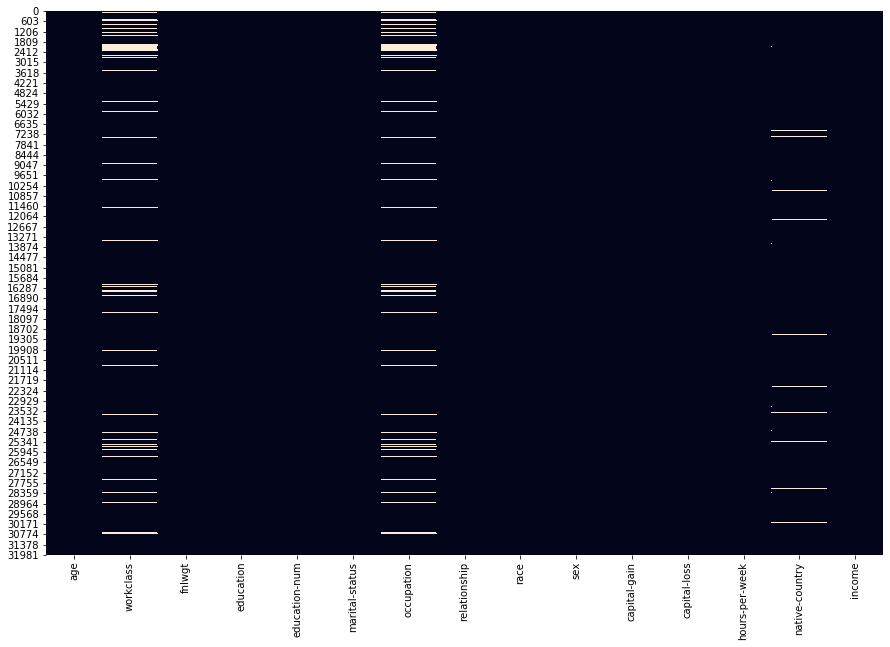

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.isnull(),cbar=False)
plt.show()

Consequentemente é necessário a remoção dos dados que possuem o valor _null_ da base dados.

In [21]:
dataset = dataset.dropna()

In [22]:
dataset.shape

(30139, 15)

In [23]:
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

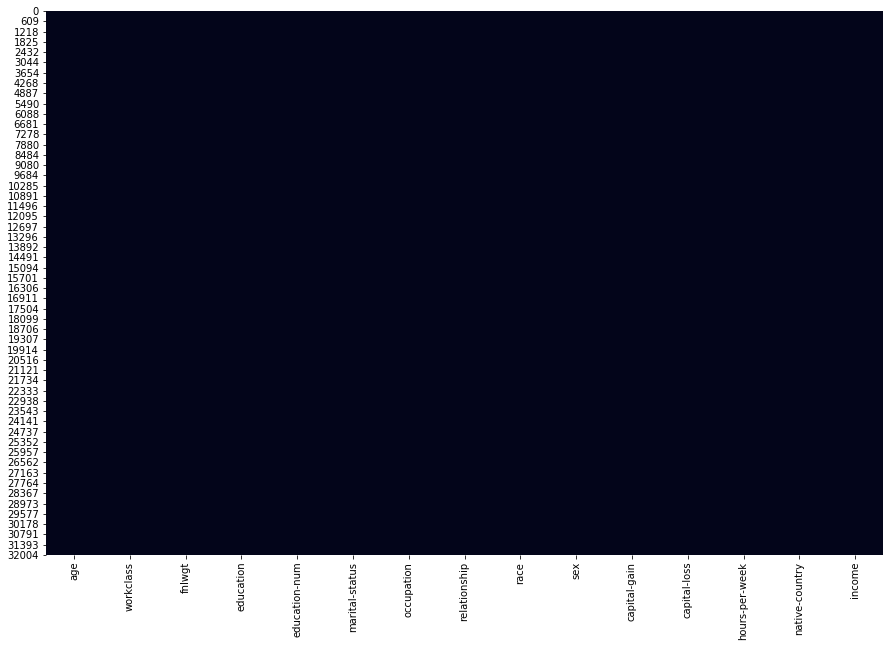

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.isnull(),cbar=False)
plt.show()

### <a id='233'>Adicionando novas colunas</a>   

#### <a id='2331'>Categorizando a coluna age</a>   

Com o intuito de realizar uma análise mais detalhada e enriquecer ainda mais a base de dados com mais informações, será adicionado novas colunas na coluna _age_ .

Com base em três categorias referente ao faixa de idade que a pessoa possui será definido as seguintes faixas de idades:
- CHILDHOOD: Idade menor que 15.
- YOUNG: Idade maior que 15 e menor que 21.
- ADULT: Idade maior que 21 e menor que 60.
- OLD: Idade Maior que 60.


In [25]:
# lista de idades presentes nos dados
dataset['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 34, 25, 43, 40,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 47, 46,
       36, 79, 27, 18, 33, 76, 55, 61, 70, 64, 71, 66, 51, 58, 26, 17, 60,
       90, 75, 65, 77, 62, 63, 67, 74, 72, 69, 68, 73, 81, 78, 88, 80, 84,
       83, 85, 82, 86])

In [26]:
def convert_period(num): 
    if num >= 15 and num < 21:
        return 'YOUNG'
    elif num >= 21 and num < 60:
        return 'ADULT'
    elif num >= 60:
        return 'OLD'
    else:
        return 'CHILDHOOD'
    
dataset['age_period'] = dataset.apply(lambda x: convert_period(x['age']),axis=1)
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_period
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,ADULT
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,ADULT
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,ADULT
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,ADULT
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,ADULT


#### <a id='2332'>Categorizando a coluna education</a>   

Outra coluna que pode ser adicionada é referente ao nível de educação que a pessoa possui. Será utilizada como base a coluna _education-num_ para realizar os cálculos para a nova coluna.


In [27]:
dataset.groupby(["education", "education-num"]).size()

education     education-num
10th          6                 820
11th          7                1048
12th          8                 377
1st-4th       2                 149
5th-6th       3                 287
7th-8th       4                 556
9th           5                 455
Assoc-acdm    12               1008
Assoc-voc     11               1307
Bachelors     13               5042
Doctorate     16                375
HS-grad       9                9834
Masters       14               1626
Preschool     1                  44
Prof-school   15                542
Some-college  10               6669
dtype: int64

Como podemos observar a coluna "education-num" representa classificação categórica da coluna "education". Assim foi definido da seguinte forma os níveis de educação:
- Low: Idade menor que 8.
- Medium: Idade maior que 8 e menor que 13.
- High: Idade maior que 13.

In [28]:
def convert_level_education(num): 
    if num < 8:
        return 'Low'
    elif num >= 8 and num < 13:
        return 'Medium'
    elif num >= 13:
        return 'High'
    
dataset['education_level'] = dataset.apply(lambda x: convert_level_education(x['education-num']),axis=1)
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_period,education_level
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,ADULT,High
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,ADULT,High
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,ADULT,Medium
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,ADULT,Low
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,ADULT,High


#### <a id='2333'>Categorizando a coluna income</a>   

In [29]:
income_map={'<=50K':1,'>50K':0}
dataset['income_cat']=dataset['income'].map(income_map).astype(int)
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_period,education_level,income_cat
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,ADULT,High,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,ADULT,High,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,ADULT,Medium,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,ADULT,Low,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,ADULT,High,1


#### <a id='2334'>Adicionando a coluna de resultado do capital</a>   

In [30]:
dataset['capital-result'] = dataset['capital-gain'] - dataset['capital-loss']
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_period,education_level,income_cat,capital-result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,ADULT,High,1,2174
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,ADULT,High,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,ADULT,Medium,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,ADULT,Low,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,ADULT,High,1,0


## <a id='24'>Amostragem</a>   

### <a id='241'>Amostragem simples - sem reposição</a>   

A base de dados possui 30139 dados após a limpeza dos dados, desta forma, a amostra simples terá 20% do total.


In [31]:
dataset.shape

(30139, 19)

In [32]:
sample20Porcentage = dataset.sample(frac=0.2)
sample20Porcentage.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_period,education_level,income_cat,capital-result
16194,32,Private,108023,Masters,14,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,<=50K,ADULT,High,1,0
26506,76,Private,208843,7th-8th,4,Widowed,Protective-serv,Not-in-family,White,Male,0,0,30,United-States,<=50K,OLD,Low,1,0
31740,40,Private,379919,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K,ADULT,Medium,1,0
15466,30,Self-emp-inc,173858,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,1902,40,South,>50K,ADULT,Medium,0,-1902
26175,29,Federal-gov,182344,HS-grad,9,Married-spouse-absent,Other-service,Unmarried,Black,Male,0,0,40,United-States,<=50K,ADULT,Medium,1,0


In [33]:
sample20Porcentage.shape

(6028, 19)

Confirmando o total de 20% de 30139.

In [34]:
display('Sumário estatístico da população', sample20Porcentage.describe())

'Sumário estatístico da população'

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income_cat,capital-result
count,6028.000000,6.028000e+03,6028.000000,6028.000000,6028.00000,6028.000000,6028.000000,6028.000000
mean,38.324652,1.899071e+05,10.119111,1095.740876,88.08079,41.077472,0.750166,1007.660086
std,13.157806,1.060991e+05,2.539957,7421.440739,400.66218,12.032096,0.432953,7445.224798
min,17.000000,1.376900e+04,1.000000,0.000000,0.00000,2.000000,0.000000,-2824.000000
25%,28.000000,1.176958e+05,9.000000,0.000000,0.00000,40.000000,1.000000,0.000000
50%,37.000000,1.800355e+05,10.000000,0.000000,0.00000,40.000000,1.000000,0.000000
75%,47.000000,2.379405e+05,12.000000,0.000000,0.00000,45.000000,1.000000,0.000000
max,90.000000,1.184622e+06,16.000000,99999.000000,2824.00000,99.000000,1.000000,99999.000000


### <a id='242'>Amostragem simples - com reposição</a>   

In [35]:
dataset.sample(frac=0.1, replace=True, random_state=1).head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_period,education_level,income_cat,capital-result
32123,44,Federal-gov,281739,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Male,13550,0,50,United-States,>50K,ADULT,Medium,0,13550
255,42,Self-emp-not-inc,303044,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Asian-Pac-Islander,Male,0,0,40,Cambodia,>50K,ADULT,Medium,0,0
13160,30,Private,189759,Bachelors,13,Never-married,Transport-moving,Not-in-family,White,Male,4865,0,40,United-States,<=50K,ADULT,High,1,4865
5664,33,Private,192644,HS-grad,9,Separated,Handlers-cleaners,Unmarried,White,Male,0,0,35,Puerto-Rico,<=50K,ADULT,Medium,1,0
18663,27,Private,120155,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,39,United-States,<=50K,ADULT,Medium,1,0


In [36]:
display('Sumário estatístico da amostra simples', dataset.sample(frac=0.1, replace=True, random_state=1).describe())

'Sumário estatístico da amostra simples'

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income_cat,capital-result
count,3014.000000,3.014000e+03,3014.000000,3014.000000,3014.000000,3014.000000,3014.000000,3014.000000
mean,38.386530,1.926676e+05,10.152953,1030.268082,88.900796,41.270073,0.748507,941.367286
std,12.707967,1.065899e+05,2.513455,6976.957017,410.160642,12.116787,0.433943,7002.100047
min,17.000000,1.930200e+04,1.000000,0.000000,0.000000,1.000000,0.000000,-4356.000000
25%,28.000000,1.211525e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,1.822880e+05,10.000000,0.000000,0.000000,40.000000,1.000000,0.000000
75%,47.000000,2.381910e+05,13.000000,0.000000,0.000000,45.000000,1.000000,0.000000
max,85.000000,1.184622e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000,99999.000000


### <a id='243'>Amostragem Sistemática</a>   

Amostra aleatória possui uma sequência, será utilizado uma sequência de 5 index.

In [37]:
sampleSistematica = dataset[::5]
sampleSistematica.head(4)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_period,education_level,income_cat,capital-result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,ADULT,High,1,2174
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,ADULT,High,1,0
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K,ADULT,Medium,0,0
16,25,Self-emp-not-inc,176756,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,35,United-States,<=50K,ADULT,Medium,1,0


In [38]:
display('Sumário estatístico da amostra sistemática', sampleSistematica.describe())

'Sumário estatístico da amostra sistemática'

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income_cat,capital-result
count,6028.000000,6.028000e+03,6028.000000,6028.000000,6028.000000,6028.000000,6028.000000,6028.000000
mean,38.325647,1.905169e+05,10.094891,1093.557896,86.868779,40.905109,0.756636,1006.689117
std,13.074849,1.067083e+05,2.554198,7259.092854,399.974049,12.017890,0.429149,7283.160846
min,17.000000,1.975200e+04,1.000000,0.000000,0.000000,1.000000,0.000000,-3683.000000
25%,28.000000,1.170692e+05,9.000000,0.000000,0.000000,40.000000,1.000000,0.000000
50%,37.000000,1.784635e+05,10.000000,0.000000,0.000000,40.000000,1.000000,0.000000
75%,47.000000,2.389478e+05,12.000000,0.000000,0.000000,45.000000,1.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,3683.000000,99.000000,1.000000,99999.000000


### <a id='244'>Amostragem estratificada</a>   

Uma forma de estratificar uma população no python é utilizar a biblioteca sklearn

In [39]:
from sklearn.model_selection import train_test_split
X, y = dataset, range(30139)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_period,education_level,income_cat,capital-result
16388,35,Private,217893,HS-grad,9,Divorced,Sales,Not-in-family,White,Female,0,0,30,United-States,<=50K,ADULT,Medium,1,0
14683,50,Federal-gov,96657,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,0,0,40,United-States,<=50K,ADULT,High,1,0
5550,29,Private,132874,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K,ADULT,Medium,1,0
19929,23,Private,99543,12th,8,Never-married,Transport-moving,Not-in-family,White,Male,0,0,46,United-States,<=50K,ADULT,Medium,1,0
8462,63,Private,264968,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,<=50K,OLD,High,1,0


## <a id='25'>Explorando e visualizando os dados</a>   

Nesta seção será explorado os dados para obter informações sobre o conjunto de dados.

### <a id='251'>Análise univariada</a>   

Como o próprio nome sugere, a análise univariada visa descrever a população examinando apenas uma variável por vez. Sendo uma maneira rápida para obter informações gerais utilizando a estimativa estatística.

A seguir será gerado gráficos de histogramas relacionados as variáveis do conjunto.

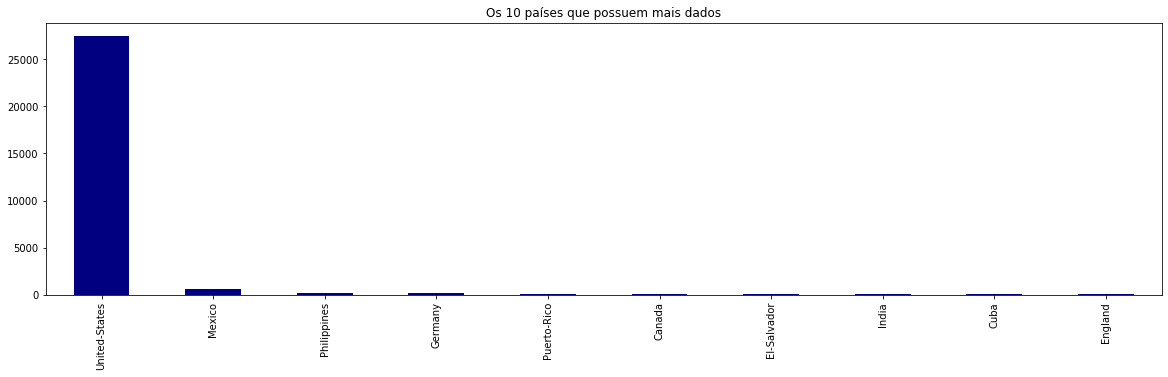

In [40]:
countries = dataset['native-country'].value_counts(ascending=False)
countries[:10].plot.bar(title='Os 10 países que possuem mais dados',colormap='jet', figsize=(20,5))

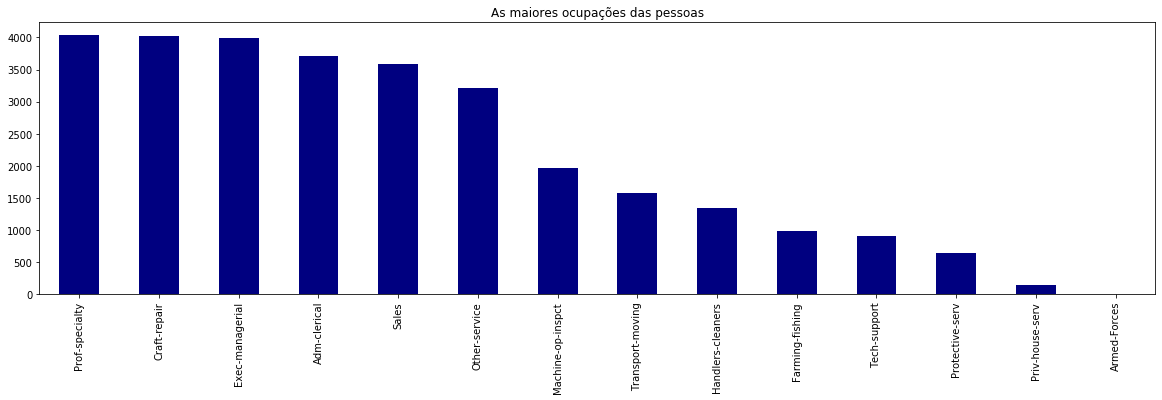

In [41]:
dataset['occupation'].value_counts().plot.bar(title='As maiores ocupações das pessoas', colormap='jet', figsize=(20,5))

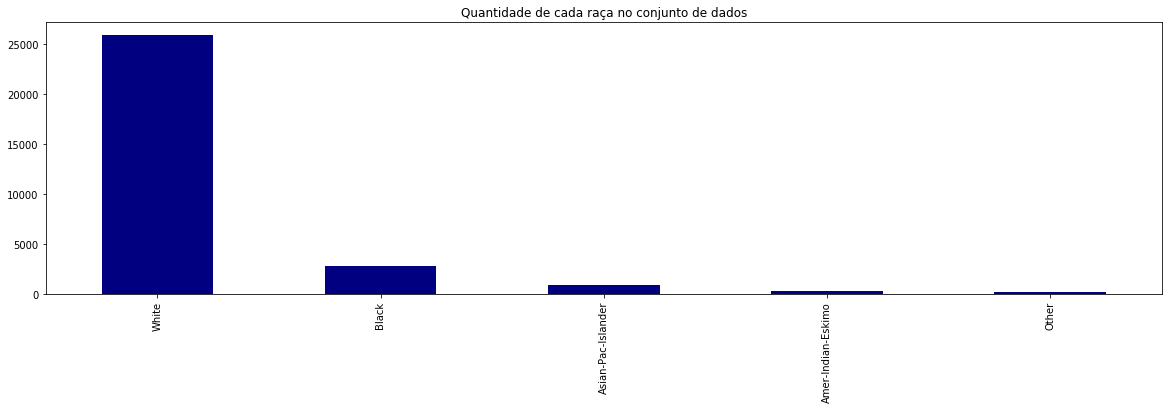

In [42]:
dataset['race'].value_counts().plot.bar(title='Quantidade de cada raça no conjunto de dados', colormap='jet', figsize=(20,5))

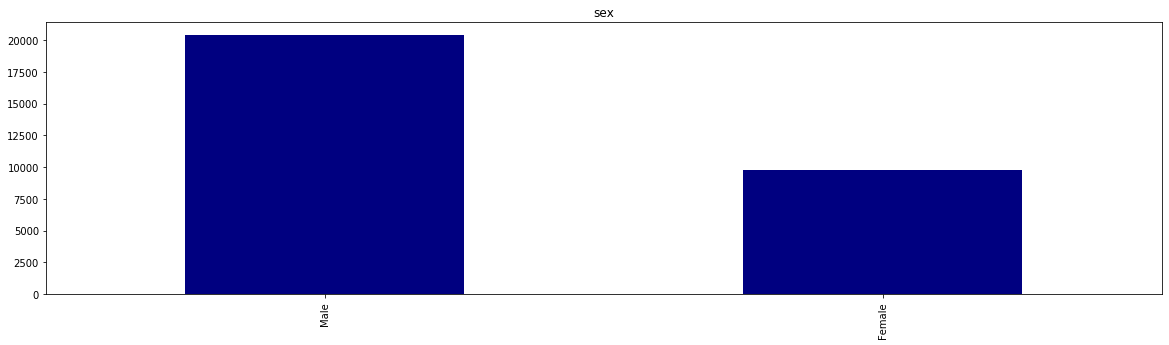

In [43]:
dataset['sex'].value_counts().plot.bar(title='sex', colormap='jet', figsize=(20,5))

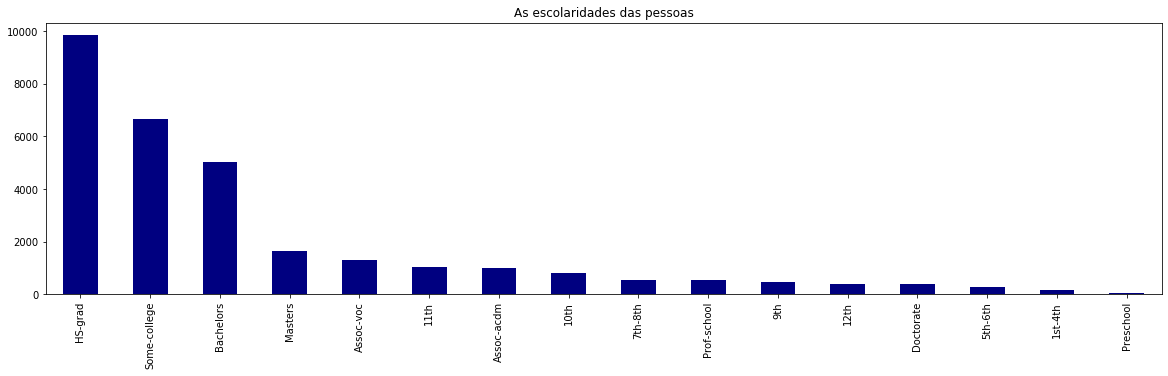

In [44]:
dataset['education'].value_counts().plot.bar(title='As escolaridades das pessoas', colormap='jet', figsize=(20,5))

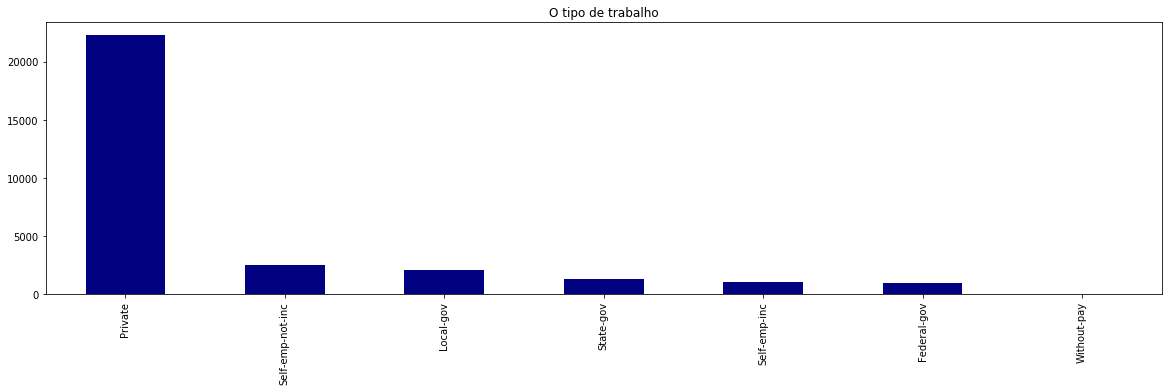

In [45]:
dataset['workclass'].value_counts().plot.bar(title='O tipo de trabalho', colormap='jet', figsize=(20,5))

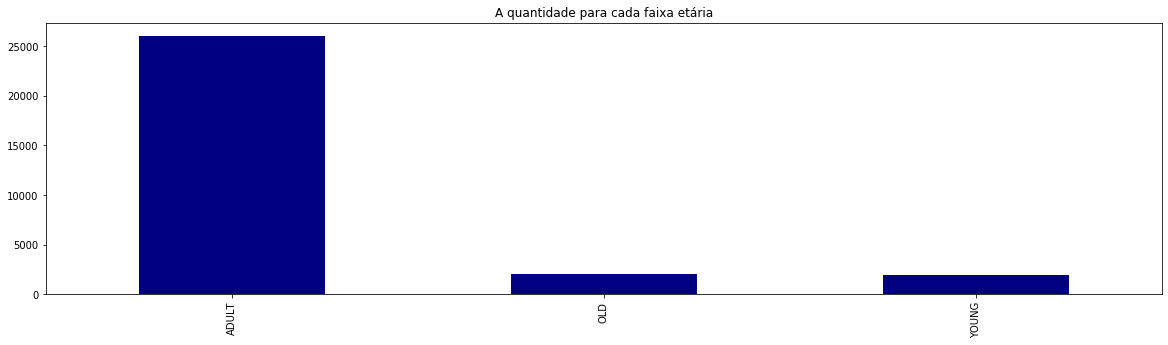

In [46]:
dataset['age_period'].value_counts().plot.bar(title='A quantidade para cada faixa etária', colormap='jet', figsize=(20,5))

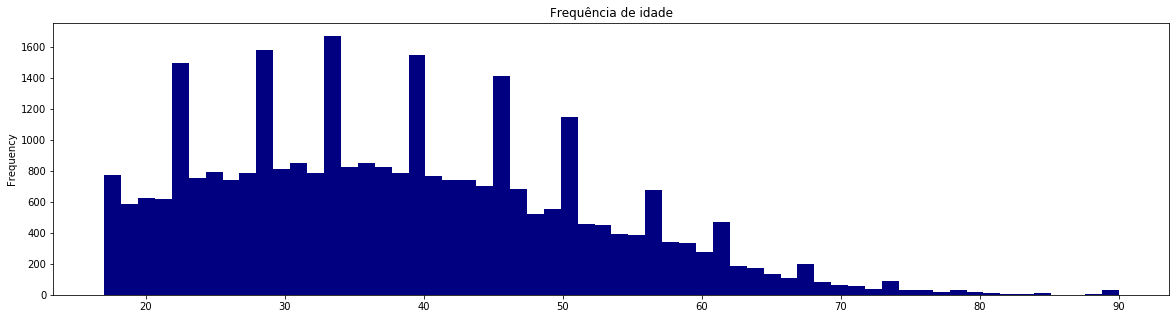

In [47]:
dataset['age'].plot(kind = 'hist', title='Frequência de idade', bins = 60, colormap='jet', figsize=(20,5))

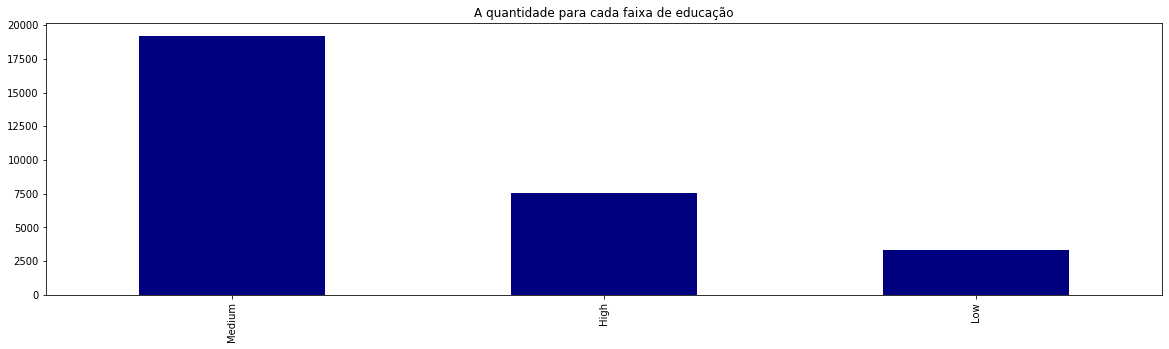

In [48]:
dataset['education_level'].value_counts().plot.bar(title='A quantidade para cada faixa de educação', colormap='jet', figsize=(20,5))

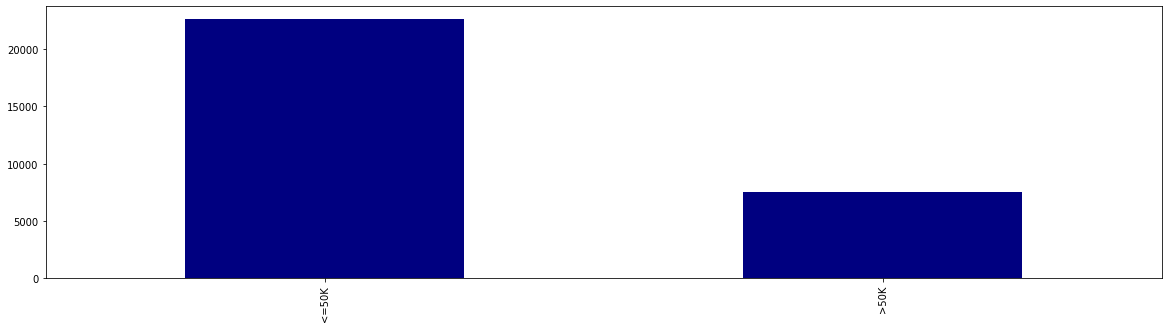

In [49]:
dataset['income'].value_counts().plot.bar(colormap='jet', figsize=(20,5))

Com base nos gráficos gerados da análise univariada já podemos obter algumas informações relevantes sobre a base de dados que as seguintes: 
- A maioria das pessoas da base são do gênero masculino.
- A maior parte dos dados é dos Estados Unidos.
- E as pessoas brancas é predominante na base dados.
- A grande maioria das pessoas possui nível de educação médio.
- A maioria trabalha para o setor privado e recebem menos de 50K.

### <a id='252'>Análise bivariada</a>   

Nesta analise será utilizado as relações entre 2 variáveis para obter obter e verificar se existe alguma informação que possui relação entre duas colunas.

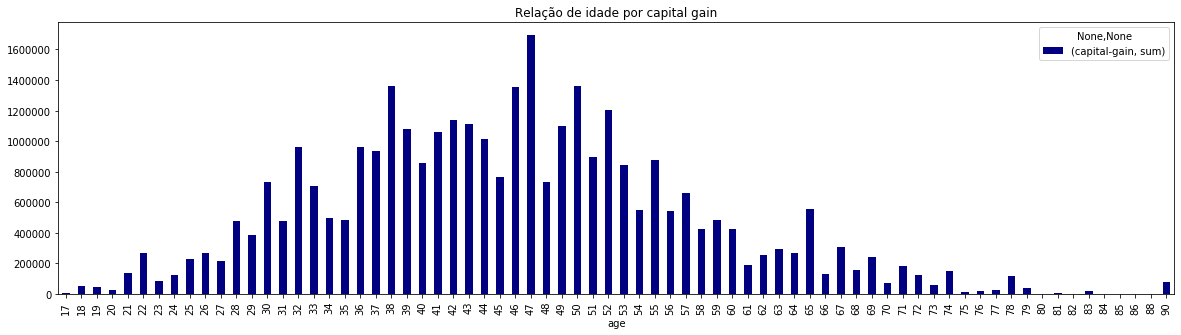

In [50]:
dataset.groupby(['age']).agg({'capital-gain': [np.sum]}).plot.bar(title='Relação de idade por capital gain',colormap='jet', figsize=(20,5))

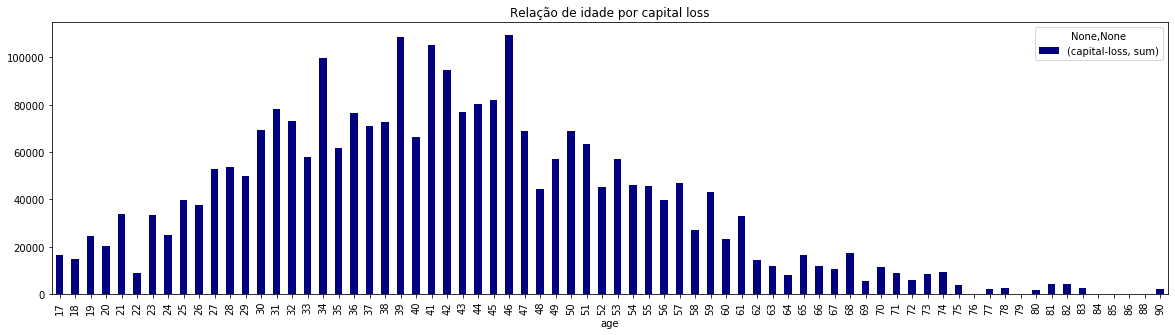

In [51]:
dataset.groupby(['age']).agg({'capital-loss': [np.sum]}).plot.bar(title='Relação de idade por capital loss',colormap='jet', figsize=(20,5))

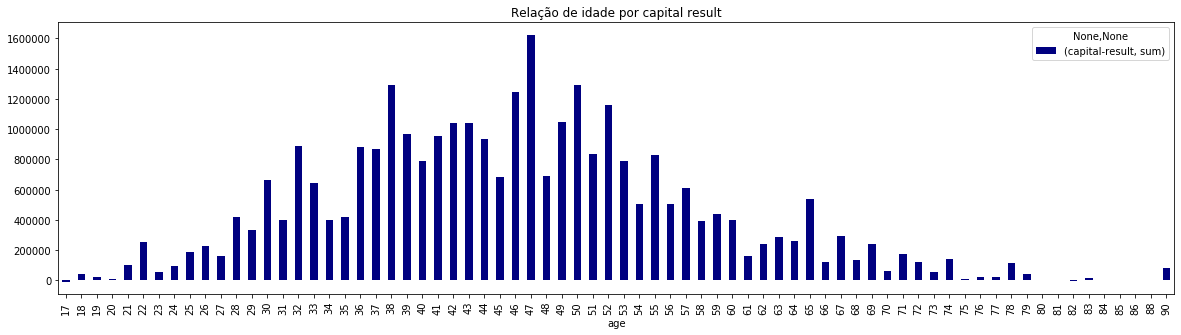

In [52]:
dataset.groupby(['age']).agg({'capital-result': [np.sum]}).plot.bar(title='Relação de idade por capital result',colormap='jet', figsize=(20,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a299a1650>,
      dtype=object)

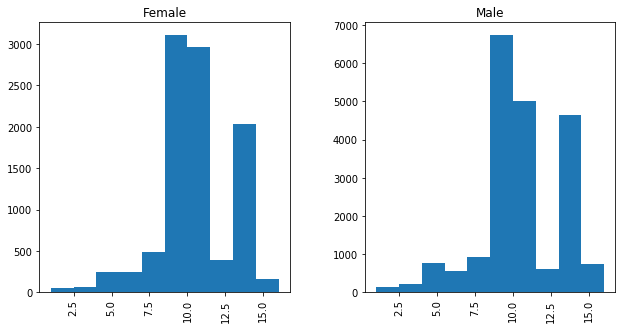

In [53]:
dataset['education-num'].hist(by=dataset['sex'], figsize=(10,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a29d22d10>,
      dtype=object)

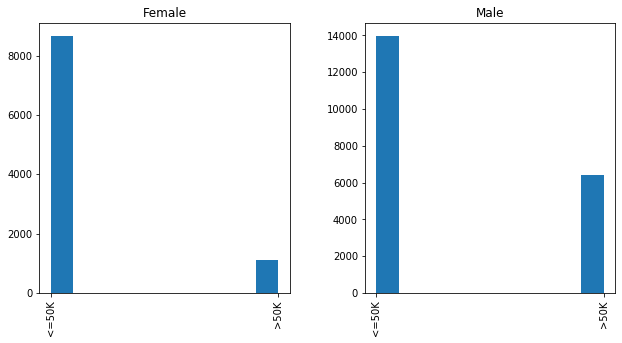

In [54]:
dataset['income'].hist(by=dataset['sex'], figsize=(10,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a29f210d0>,
      dtype=object)

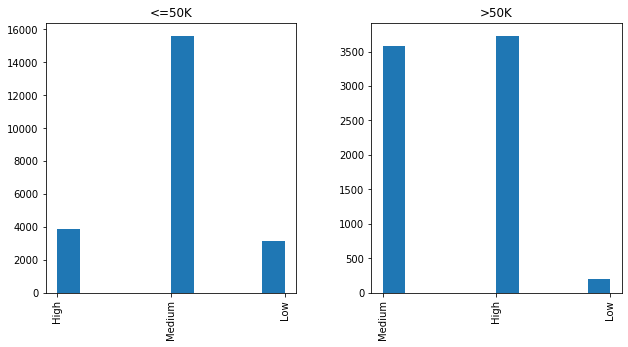

In [55]:
dataset['education_level'].hist(by=dataset['income'], figsize=(10,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a29f0edd0>,
      dtype=object)

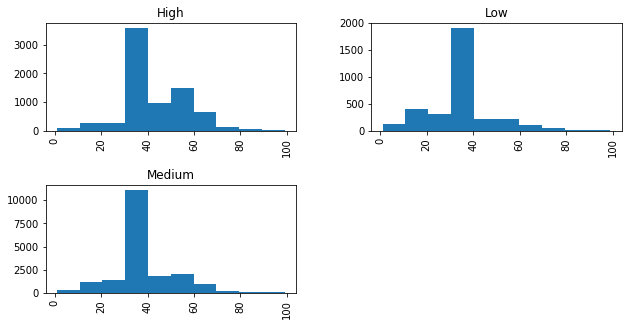

In [56]:
dataset['hours-per-week'].hist(by=dataset['education_level'], figsize=(10,5))

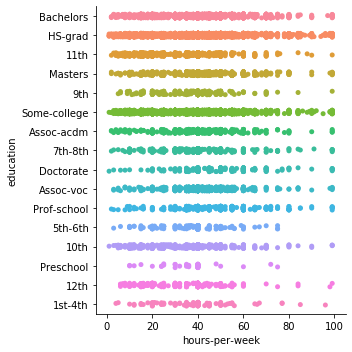

In [57]:
sns.catplot(x="hours-per-week", y="education", data=dataset);

In [58]:
dataset[['education-num','hours-per-week']].groupby(['education-num']).mean()

,hours-per-week
education-num,
1,36.568182
2,38.355705
3,38.742160
4,40.131295
5,38.767033
6,37.464634
7,34.193702
8,35.697613
9,41.041895


In [59]:
dataset[['workclass','hours-per-week']].groupby(['workclass']).mean()

,hours-per-week
workclass,
Federal-gov,41.279958
Local-gov,41.002419
Private,40.254851
Self-emp-inc,48.802607
Self-emp-not-inc,44.433947
State-gov,39.053948
Without-pay,32.714286


In [60]:
dataset[['relationship','income_cat']].groupby(['relationship']).mean()

,income_cat
relationship,
Husband,0.544272
Not-in-family,0.893311
Other-relative,0.960630
Own-child,0.985657
Unmarried,0.933666
Wife,0.506401


Com base nos gráficos gerados da análise bivariada contem algumas informações relevantes sobre a base, tais como:
- Quanto maior o grau de educação maior é a taxa de horas trabalhadas por semana. Por exemplo, a média de horas trabalhadas que tinham apenas a escolaridade 9th possuem a média de 38.767033 enquanto para Doctorate é de 47.832000.
- E Self-employment tem uma média maior de trabalho comparado com os outros tipos.
- Na base de dados os homens possuem maior nível de educação

### <a id='253'>Análise Multivariada</a>   

É a análise mais complexa comparada coma a univariada e bivariada resultante da multiplicidade das variáveis. 

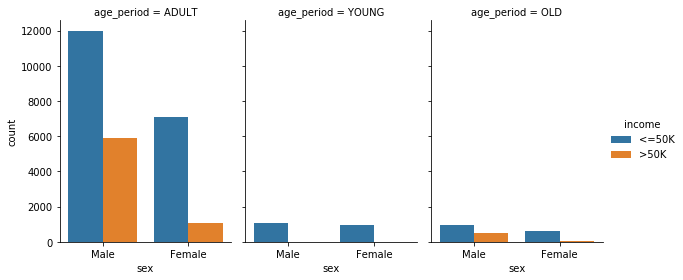

In [61]:
sns.catplot(x="sex", hue="income", col="age_period",
                 data=dataset, kind="count",
                 height=4, aspect=.7);

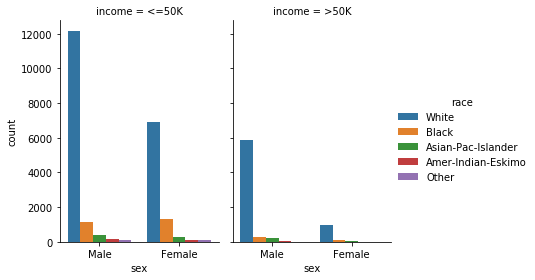

In [62]:
sns.catplot(x="sex", hue="race", col="income",
                 data=dataset, kind="count",
                 height=4, aspect=.7);

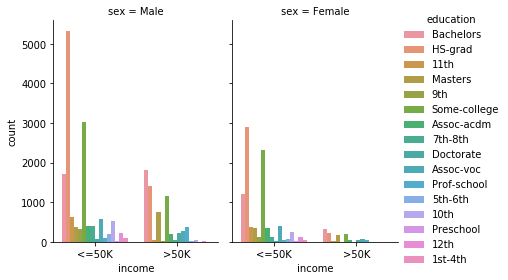

In [63]:
sns.catplot(x="income", hue="education", col="sex",
                 data=dataset, kind="count",
                 height=4, aspect=.7);

## <a id='26'>Analisando os conjuntos de dados</a>   

Nesta seção serão realizadas análises utilizando diferentes amostras da população de dados onde será possível obter uma detalhamento do conjunto de dados. Serão utilizados as seguintes amostras:
- População 
- Amostra simples (20%)

Serão verificados os seguintes dados:

    a) A média de idade geral, das mulheres e dos homens.
    b) média e o desvio padrão da idade dos que recebem mais de 50 mil por ano menos de 50 mil por ano e para homens e mulheres.
    c) média e o desvio padrão da idade por país
    d) média e o desvio padrão das horas trabalhadas por educação para os recebem mais de 50 mil por ano menos de 50 mil por ano.

### a) - Utilizando a população

In [64]:
print('Idade geral da base de dados: ', dataset['age'].mean())
print('Idade das mulheres: ', dataset.loc[dataset['sex'] == 'Female', 'age'].mean())
print('Idade dos homens: ', dataset.loc[dataset['sex'] == 'Male', 'age'].mean())

Idade geral da base de dados:  38.44172003052523
Idade das mulheres:  36.89061700603704
Idade dos homens:  39.18604536973387


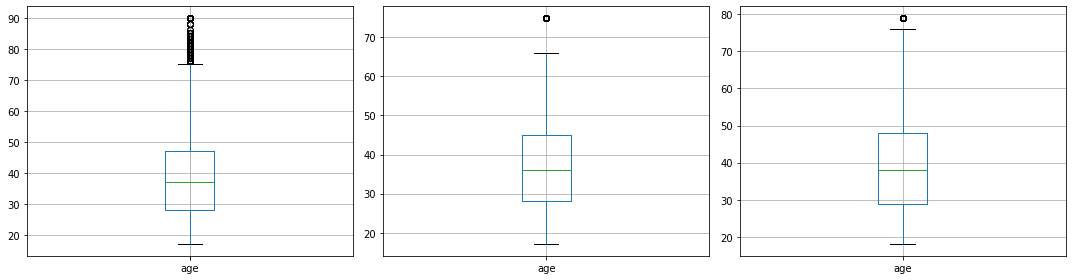

In [65]:
fig, axes = plt.subplots(1,3, figsize=(15,4)) # create figure and axes

a = dataset.boxplot(column =['age'], ax=axes.flatten()[0]) 
a = dataset.boxplot(column =['age'], ax=axes.flatten()[0]) 
dataset[dataset['sex'].isin(['Female'])].iloc[dataset['age']].boxplot(column =['age'], ax=axes.flatten()[1]) 
dataset[dataset['sex'].isin(['Male'])].iloc[dataset['age']].boxplot(column =['age'], ax=axes.flatten()[2]) 

plt.tight_layout() 
plt.show()

a) - Utilizando a amostra simples

In [66]:
sample20Per = pd.DataFrame(data=sample20Porcentage)

print('Idade geral da base de dados: ', sample20Per['age'].mean())
print('Idade das mulheres: ', sample20Per.loc[sample20Per['sex'] == 'Female', 'age'].mean())
print('Idade dos homens: ', sample20Per.loc[sample20Per['sex'] == 'Male', 'age'].mean())

Idade geral da base de dados:  38.32465162574652
Idade das mulheres:  36.94499221587961
Idade dos homens:  38.97293343087052


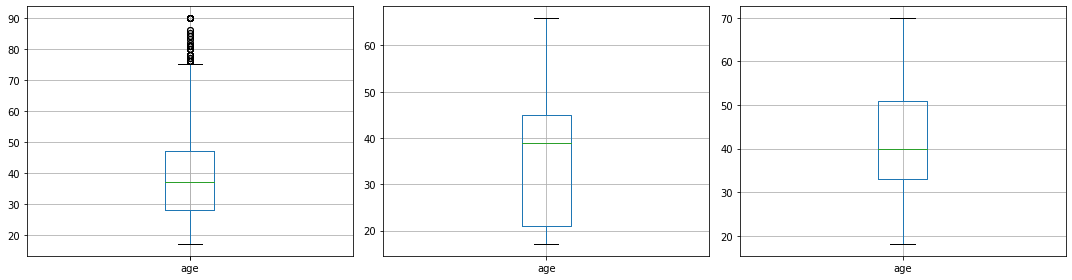

In [67]:
fig, axes = plt.subplots(1,3, figsize=(15,4)) # create figure and axes

a = sample20Per.boxplot(column =['age'], ax=axes.flatten()[0]) 
a = sample20Per.boxplot(column =['age'], ax=axes.flatten()[0]) 
sample20Per[sample20Per['sex'].isin(['Female'])].iloc[sample20Per['age']].boxplot(column =['age'], ax=axes.flatten()[1]) 
sample20Per[sample20Per['sex'].isin(['Male'])].iloc[sample20Per['age']].boxplot(column =['age'], ax=axes.flatten()[2]) 

plt.tight_layout() 
plt.show()

### b) Utilizando a população

In [68]:
print('Média de idade para as quem recebe menos de <=50K: ', round(dataset.loc[dataset['income'] == '<=50K', 'age'].mean(), 2))
print('Média de idade para as quem recebe menos de >50K: ', round(dataset.loc[dataset['income'] == '>50K', 'age'].mean(), 2))
print('')
WhiteDatacapitalGain = dataset[(dataset['native-country'] == 'United-States') & (dataset['race'] == 'White')]['capital-gain']

print('Male: Média de idade para as quem recebe menos de <=50K: ', 
      round(dataset[(dataset['income'] == '<=50K') & (dataset['sex'] == 'Male')]['age'].mean(), 2))
print('Male: Média de idade para as quem recebe menos de >50K: ', 
      round(dataset[(dataset['income'] == '>50K') & (dataset['sex'] == 'Male')]['age'].mean(), 2))
print('')

print('Female: Média de idade para as quem recebe menos de <=50K: ', 
      round(dataset[(dataset['income'] == '<=50K') & (dataset['sex'] == 'Female')]['age'].mean(), 2))
print('Female: Média de idade para as quem recebe menos de >50K: ', 
      round(dataset[(dataset['income'] == '>50K') & (dataset['sex'] == 'Female')]['age'].mean(), 2))

Média de idade para as quem recebe menos de <=50K:  36.61
Média de idade para as quem recebe menos de >50K:  43.96

Male: Média de idade para as quem recebe menos de <=50K:  36.84
Male: Média de idade para as quem recebe menos de >50K:  44.31

Female: Média de idade para as quem recebe menos de <=50K:  36.24
Female: Média de idade para as quem recebe menos de >50K:  41.96


b) Utilizando amostra simples

In [69]:
print('Média de idade para as quem recebe menos de <=50K: ', round(sample20Per.loc[sample20Per['income'] == '<=50K', 'age'].mean(), 2))
print('Média de idade para as quem recebe menos de >50K: ', round(sample20Per.loc[sample20Per['income'] == '>50K', 'age'].mean(), 2))
print('')
WhiteDatacapitalGain = sample20Per[(sample20Per['native-country'] == 'United-States') & (sample20Per['race'] == 'White')]['capital-gain']

print('Male: Média de idade para as quem recebe menos de <=50K: ', 
      round(sample20Per[(sample20Per['income'] == '<=50K') & (sample20Per['sex'] == 'Male')]['age'].mean(), 2))
print('Male: Média de idade para as quem recebe menos de >50K: ', 
      round(sample20Per[(sample20Per['income'] == '>50K') & (sample20Per['sex'] == 'Male')]['age'].mean(), 2))
print('')

print('Female: Média de idade para as quem recebe menos de <=50K: ', 
      round(sample20Per[(sample20Per['income'] == '<=50K') & (sample20Per['sex'] == 'Female')]['age'].mean(), 2))
print('Female: Média de idade para as quem recebe menos de >50K: ', 
      round(sample20Per[(sample20Per['income'] == '>50K') & (sample20Per['sex'] == 'Female')]['age'].mean(), 2))

Média de idade para as quem recebe menos de <=50K:  36.45
Média de idade para as quem recebe menos de >50K:  43.95

Male: Média de idade para as quem recebe menos de <=50K:  36.58
Male: Média de idade para as quem recebe menos de >50K:  44.28

Female: Média de idade para as quem recebe menos de <=50K:  36.23
Female: Média de idade para as quem recebe menos de >50K:  42.16


### c) Utilizando a população

In [70]:
categorical_attributes = ['United-States', 'Mexico', 'Philippines', 'Germany', 'Puerto-Rico']
for i, attribute in enumerate(categorical_attributes):
    print(attribute, '- Mean: ', dataset[(dataset['native-country'] == attribute)]['age'].mean(), '| std: ', dataset[(dataset['native-country'] == attribute)]['age'].std())

United-States - Mean:  38.50605740895696 | std:  13.180951912579847
Mexico - Mean:  33.21452145214521 | std:  10.650892346988696
Philippines - Mean:  39.755319148936174 | std:  12.82601481549635
Germany - Mean:  39.6953125 | std:  12.415102939723738
Puerto-Rico - Mean:  40.14678899082569 | std:  12.886847794376763


c) Utilizando a amostra simples

In [71]:
categorical_attributes = ['United-States', 'Mexico', 'Philippines', 'Germany', 'Puerto-Rico']
for i, attribute in enumerate(categorical_attributes):
    print(attribute, '- Mean: ', sample20Per[(sample20Per['native-country'] == attribute)]['age'].mean(), '| std: ', sample20Per[(sample20Per['native-country'] == attribute)]['age'].std())

United-States - Mean:  38.44883763499909 | std:  13.221138676163932
Mexico - Mean:  33.152542372881356 | std:  10.719920843122145
Philippines - Mean:  37.68571428571428 | std:  10.41427591612316
Germany - Mean:  39.583333333333336 | std:  13.500134191496239
Puerto-Rico - Mean:  36.095238095238095 | std:  12.312208420526197


### d) Utilizando a população

In [72]:
categorical_attributes = ['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college', 'Assoc-acdm', '7th-8th', 'Doctorate', 'Assoc-voc', 'Prof-school', '5th-6th', '10th', 'Preschool', '12th', '1st-4th']
for i, attribute in enumerate(categorical_attributes):
    
    print(attribute, '- Mean <=50K: ', round(dataset.loc[dataset['income'] == '<=50K', 'hours-per-week'].mean(),2),
         '|| Mean >50K: ', round(dataset.loc[dataset['income'] == '>50K', 'hours-per-week'].mean(), 2))

Bachelors - Mean <=50K:  39.35 || Mean >50K:  45.71
HS-grad - Mean <=50K:  39.35 || Mean >50K:  45.71
11th - Mean <=50K:  39.35 || Mean >50K:  45.71
Masters - Mean <=50K:  39.35 || Mean >50K:  45.71
9th - Mean <=50K:  39.35 || Mean >50K:  45.71
Some-college - Mean <=50K:  39.35 || Mean >50K:  45.71
Assoc-acdm - Mean <=50K:  39.35 || Mean >50K:  45.71
7th-8th - Mean <=50K:  39.35 || Mean >50K:  45.71
Doctorate - Mean <=50K:  39.35 || Mean >50K:  45.71
Assoc-voc - Mean <=50K:  39.35 || Mean >50K:  45.71
Prof-school - Mean <=50K:  39.35 || Mean >50K:  45.71
5th-6th - Mean <=50K:  39.35 || Mean >50K:  45.71
10th - Mean <=50K:  39.35 || Mean >50K:  45.71
Preschool - Mean <=50K:  39.35 || Mean >50K:  45.71
12th - Mean <=50K:  39.35 || Mean >50K:  45.71
1st-4th - Mean <=50K:  39.35 || Mean >50K:  45.71


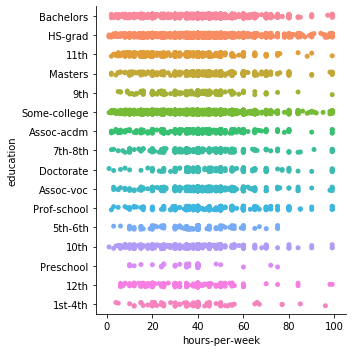

In [73]:
sns.catplot(x="hours-per-week", y="education", data=dataset);

d) Utilizando a amostra simples

In [74]:
categorical_attributes = ['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college', 'Assoc-acdm', '7th-8th', 'Doctorate', 'Assoc-voc', 'Prof-school', '5th-6th', '10th', 'Preschool', '12th', '1st-4th']
for i, attribute in enumerate(categorical_attributes):
    
    print(attribute, '- Mean <=50K: ', round(sample20Per.loc[sample20Per['income'] == '<=50K', 'hours-per-week'].mean(),2),
         '|| Mean >50K: ', round(sample20Per.loc[sample20Per['income'] == '>50K', 'hours-per-week'].mean(), 2))

Bachelors - Mean <=50K:  39.51 || Mean >50K:  45.8
HS-grad - Mean <=50K:  39.51 || Mean >50K:  45.8
11th - Mean <=50K:  39.51 || Mean >50K:  45.8
Masters - Mean <=50K:  39.51 || Mean >50K:  45.8
9th - Mean <=50K:  39.51 || Mean >50K:  45.8
Some-college - Mean <=50K:  39.51 || Mean >50K:  45.8
Assoc-acdm - Mean <=50K:  39.51 || Mean >50K:  45.8
7th-8th - Mean <=50K:  39.51 || Mean >50K:  45.8
Doctorate - Mean <=50K:  39.51 || Mean >50K:  45.8
Assoc-voc - Mean <=50K:  39.51 || Mean >50K:  45.8
Prof-school - Mean <=50K:  39.51 || Mean >50K:  45.8
5th-6th - Mean <=50K:  39.51 || Mean >50K:  45.8
10th - Mean <=50K:  39.51 || Mean >50K:  45.8
Preschool - Mean <=50K:  39.51 || Mean >50K:  45.8
12th - Mean <=50K:  39.51 || Mean >50K:  45.8
1st-4th - Mean <=50K:  39.51 || Mean >50K:  45.8


# <a id='3'>Parte II</a>   
Será utiizado o classificador do método Naive Bayes para classificar o dado de _income_ a partir do exercicio anterior.

In [75]:
df = pd.read_csv('adult.data')
df = pd.DataFrame(data=df)
dataset = pd.read_csv("adult.data", 
                  sep=',', names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
                                     'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
                                     'hours-per-week', 'native-country', 'income'])

In [76]:
import pandas as pd

base = dataset
 
# Divisão do Dataset contemplando categorias mais significativas para a análise 
features = base.iloc[:, 0:14].values
target = base.iloc[:, 14].values
                
#Import do OneHotEncoder, ColumnTransformer e LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
 
onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [1,3,5,6,7,8,9,13])],remainder='passthrough')
features = onehotencorder.fit_transform(features).toarray()
 
labelencorder_classe = LabelEncoder()
target = labelencorder_classe.fit_transform(target)

## <a id='31'>1 Experimento</a>   

Será dividido nesse primeiro experimento a população do conjunto de dados em conjunto de treinamento e conjunto de teste utilizando uma divisão com 70% na base de treinamento e 30% na base de teste.

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)

In [78]:
#Import do Naive Bayes Gaussian model
from sklearn.naive_bayes import GaussianNB

#Criando o Gaussian Classifier
gnb = GaussianNB()

# Treinando o modelo usando os conjuntos de treinamento
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [79]:
from sklearn.metrics import confusion_matrix, accuracy_score
score = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print('Accuracy Score: {0:.4f}'.format(score))

Accuracy Score: 0.7974


#### A matriz de confusão 

É utilizado para obter o desempenho quando é utilizado um algoritmo de classificação. Desta forma, é gerado uma imagem mostra a relação do desempenho do modelo de classificação e dos tipos de erros produzidos pelo modelo com as previsões corretas e incorretas, por cada categoria. O resumo é representado em forma de tabela a seguir:

Consusion Matrix
[[7041  366]
 [1613  749]]


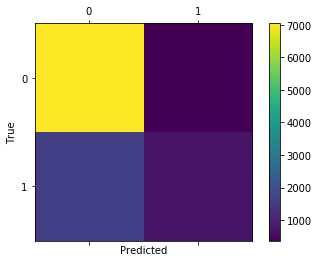

In [80]:
print('Consusion Matrix')
print( matrix)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Relatório de classificação

O relatório de classificação é outra maneira de avaliar o desempenho do modelo de classificação. Ele exibe as pontuações de precisão, recall, f1 e suporte para o modelo.

In [81]:
from sklearn.metrics import classification_report

c_r = classification_report(y_test, y_pred)
print ('Classification Report:\n %s' % c_r)


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.88      7407
           1       0.67      0.32      0.43      2362

    accuracy                           0.80      9769
   macro avg       0.74      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769



## <a id='32'>2 Experimento</a>   

Será utilizado neste segundo experimento uma divisão com 80% na base de treinamento e 20% na base de teste.

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [83]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
score = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print('Accuracy Score: {0:.4f}'.format(score))
print('Consusion Matrix')
print( matrix)
c_r = classification_report(y_test, y_pred)
print ('Classification Report:\n %s' % c_r)

Accuracy Score: 0.7936
Consusion Matrix
[[4675  243]
 [1101  494]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.87      4918
           1       0.67      0.31      0.42      1595

    accuracy                           0.79      6513
   macro avg       0.74      0.63      0.65      6513
weighted avg       0.78      0.79      0.76      6513



## <a id='33'>3 Experimento</a>  

Utilizando o código que foi apresentado em sala de aula

In [84]:
base = dataset
 
# converter object para o tipo category
base['workclass'] = base['workclass'].astype('category')
base['education'] = base['education'].astype('category')
base['marital-status'] = base['marital-status'].astype('category')
base['occupation'] = base['occupation'].astype('category')
base['relationship'] = base['relationship'].astype('category')
base['race'] = base['race'].astype('category')
base['sex'] = base['sex'].astype('category')
base['native-country'] = base['native-country'].astype('category')
base['income'] = base['income'].astype('category')

base["sex_cat"] = base["sex"].cat.codes
base["education_cat"] = base["education"].cat.codes
base["marital-status_cat"] = base["marital-status"].cat.codes
base["relationship_cat"] = base["relationship"].cat.codes
base["race_cat"] = base["race"].cat.codes
base["workclass_cat"] = base["workclass"].cat.codes
base["income_cat"] = base["income"].cat.codes

data = dataset[['age', "sex_cat", 'education_cat', 'capital-gain' , 'capital-loss', 'marital-status_cat', 'relationship_cat', 'race_cat', 'workclass_cat', 'income_cat']]
data.head()

,age,sex_cat,education_cat,capital-gain,capital-loss,marital-status_cat,relationship_cat,race_cat,workclass_cat,income_cat
0,39,1,9,2174,0,4,1,4,7,0
1,50,1,9,0,0,2,0,4,6,0
2,38,1,11,0,0,0,1,4,4,0
3,53,1,1,0,0,2,0,2,4,0
4,28,0,9,0,0,2,5,2,4,0


Separar por coluna

In [85]:
def separate_by_class(dataset):
  classes = np.unique(dataset['income_cat'])

  separated = []
  for cl in classes:
    separated.append(dataset[dataset['income_cat'] == cl])

  return separated

separated = separate_by_class(data)

In [86]:
def summarize_dataset(dataset, eliminate_last=True):
  if eliminate_last:
    columns = dataset.columns[:-1]
  else:
    columns = dataset.columns
  summaries = [(np.mean(dataset[column]), np.std(dataset[column]), len(dataset[column])) for column in dataset.columns]
  del(summaries[-1])
  return summaries

summaries = summarize_dataset(data)

print(summaries)

[(38.58164675532078, 13.640223092304275, 32561), (0.6692054912318418, 0.47049920482078517, 32561), (10.298209514449802, 3.8702045191455334, 32561), (1077.6488437087312, 7385.178676947626, 32561), (87.303829734959, 402.9540308274866, 32561), (2.6118362458155464, 1.5061985937546845, 32561), (1.4463622124627622, 1.606746276983888, 32561), (3.6658579281963086, 0.8487925701176219, 32561), (3.8688922330395257, 1.4559374031958532, 32561)]


In [87]:
def summarize_by_class(dataset):
  separated = separate_by_class(dataset)
  summaries = dict()
  for s in separated:
    class_value = np.array(s['income_cat'])
    rows = s[s.columns]
    summaries[class_value[0]] = summarize_dataset(rows, eliminate_last=False)
  return summaries

summaries_by_class = summarize_by_class(data)
print(summaries_by_class)

{0: [(36.78373786407767, 14.019804910115282, 24720), (0.6119741100323625, 0.48730052193945006, 24720), (10.125323624595469, 4.130475905503715, 24720), (148.75246763754046, 963.1198261948545, 24720), (53.14292071197411, 310.7494835190029, 24720), (2.780906148867314, 1.6236693294866382, 24720), (1.6734223300970874, 1.5479464744159297, 24720), (3.6315129449838186, 0.8791096604746592, 24720), (3.8265776699029126, 1.4681012007191967, 24720)], 1: [(44.24984058155847, 10.51835692766163, 7841), (0.8496365259533223, 0.3574273348798212, 7841), (10.84325978829231, 2.832355514490662, 7841), (4006.142456319347, 14569.449806812894, 7841), (195.00153041703865, 595.449600087455, 7841), (2.078816477490116, 0.8574817887853935, 7841), (0.7305190664456064, 1.5784379113363407, 7841), (3.7741359520469326, 0.7347475372613946, 7841), (4.002295625557965, 1.40860939252299, 7841)]}


In [88]:
def calculate_probability(x, mean, stdev):
    exponent = np.exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (np.sqrt(2 * np.pi) * stdev)) * exponent

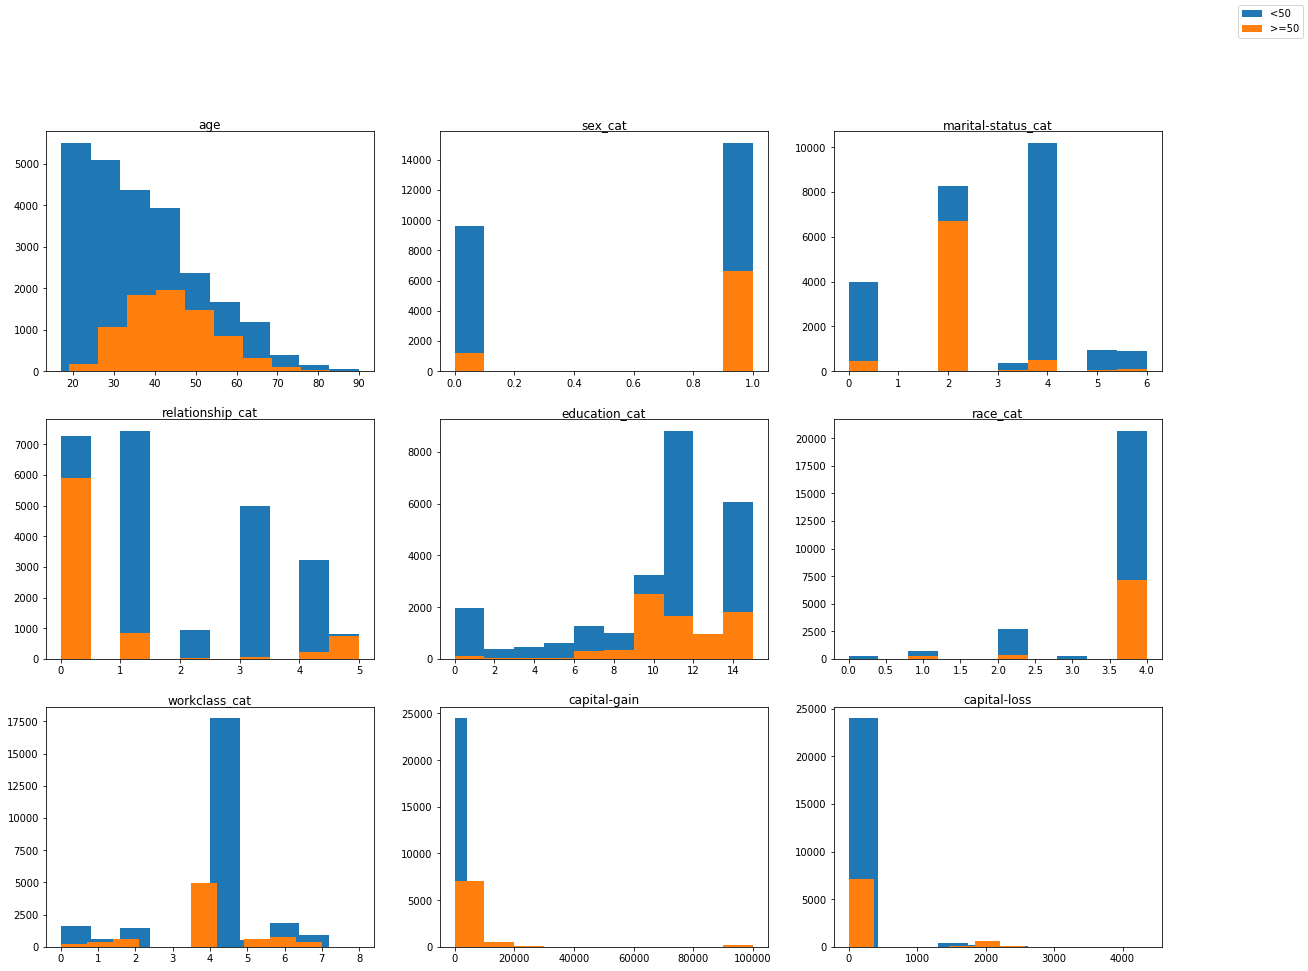

In [89]:
fig,ax = plt.subplots(3,3)
fig.set_size_inches(20,h=15)
for s in separated:
    ax[0,0].set_title('age', horizontalalignment='center', verticalalignment='top')
    ax[0,0].hist(s['age'])
    ax[0,1].set_title('sex_cat', horizontalalignment='center', verticalalignment='top')
    ax[0,1].hist(s['sex_cat'])
    ax[0,2].set_title('marital-status_cat', horizontalalignment='center', verticalalignment='top')
    ax[0,2].hist(s['marital-status_cat'])
    
    ax[1,0].set_title('relationship_cat', horizontalalignment='center', verticalalignment='top')
    ax[1,0].hist(s['relationship_cat'])
    ax[1,1].set_title('education_cat', horizontalalignment='center', verticalalignment='top')
    ax[1,1].hist(s['education_cat'])
    ax[1,2].set_title('race_cat', horizontalalignment='center', verticalalignment='top')
    ax[1,2].hist(s['race_cat'])    
    
    ax[2,0].set_title('workclass_cat', horizontalalignment='center', verticalalignment='top')
    ax[2,0].hist(s['workclass_cat'])
    ax[2,1].set_title('capital-gain', horizontalalignment='center', verticalalignment='top')
    ax[2,1].hist(s['capital-gain'])      
    ax[2,2].set_title('capital-loss', horizontalalignment='center', verticalalignment='top')
    ax[2,2].hist(s['capital-loss'])    
    
fig.legend(['<50', '>=50'])



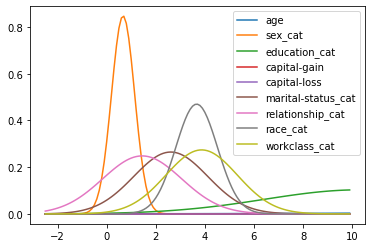

In [90]:
x = np.arange(-2.5,10,0.1)
for summ in summaries:
  y = calculate_probability(x, summ[0], summ[1])
  plt.plot(x,y)

plt.legend(['age', "sex_cat", 'education_cat', 'capital-gain' , 'capital-loss', 'marital-status_cat', 'relationship_cat', 'race_cat', 'workclass_cat', 'income_cat'])

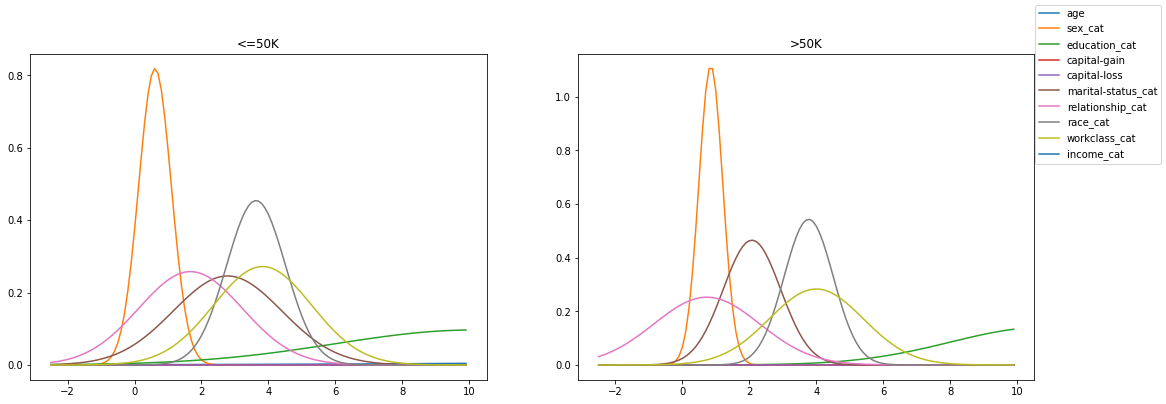

In [91]:
n_classes = len(summaries_by_class)
fig,ax = plt.subplots(1,n_classes)
fig.set_size_inches(18, h=6)

classes_name = ['<=50K', '>50K']
for c in range(n_classes):
  for summ in summaries_by_class[c]:
    ax[c].plot(x, calculate_probability(x, summ[0], summ[1]))
  ax[c].set_title(classes_name[c])

fig.legend(['age', "sex_cat", 'education_cat', 'capital-gain' , 'capital-loss', 'marital-status_cat', 'relationship_cat', 'race_cat', 'workclass_cat', 'income_cat'])

In [92]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [93]:
def calculate_class_probabilities(summaries, row):
  total_rows = sum([summaries[label][0][2] for label in summaries])
  probabilities = dict()
  for class_value, class_summaries in summaries.items():
    probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
    for i in range(len(class_summaries)):
      mean, stdev, count = class_summaries[i]
      probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
  return probabilities

In [94]:
def predict(summaries, row):

    probabilities = calculate_class_probabilities(summaries, row)
    best_label, best_prob = None, -1
    for class_value, probability in probabilities.items():
        if best_label is None or probability > best_prob:
            best_prob = probability
            best_label = class_value
    return best_label

In [95]:
def split(dataset):
  sz = dataset.shape[0]
  sh = np.arange(sz)
  np.random.shuffle(sh)
  vec = np.zeros((sz),dtype=bool)
  vec[sh[:int(sz*0.75)]] = True
  train = dataset.loc[vec]
  test = dataset.loc[~vec]

  return train, test

In [96]:
train,test = split(data)

In [97]:
# Naive Bayes Algorithm
def naive_bayes(train, test):
  summarize = summarize_by_class(train)
  predictions = list()
  vec = np.zeros(test.shape[0], dtype=bool)
  for i in range(test.shape[0]):
    vec[i] = True
    row = np.array(test.loc[vec])[0]
    output = predict(summarize, row)
    predictions.append(output)
    vec[i] = False
  return(predictions)

In [98]:
predictions = naive_bayes(train,test)

#print(predictions)
actual = np.array(test['income_cat'])
## print(actual)

print('Accuracy ', accuracy_metric(actual, predictions))

Accuracy  79.87962166809974


In [99]:
gnb = GaussianNB()
pred = gnb.fit(features, target).predict(features)
print(accuracy_metric(actual, pred))
gnb.score(features, target)

69.96683454121116


0.7950922883203833

# <a id='4'>Parte III</a>   

Nesta última parte do trabalho, será realizado o teste de hipóteses que permite tomar uma decisão utilizando os dados observados de um determinado experimento. Sendo assim, com o resultado obtido poderá determinar quais resultados podem levar à rejeição da hipótese nula. Assim, serão visto os seguintes conceitos:

- escore padrão - escore-z
- Margem de erro
- intervalo de confiança
- Encontrar o tamanho mínimo da amostra pra estimar (?)
- t-test
- z-test
- Hypotheses Test

## <a id='41'>Comparando escores-z de conjuntos de dados diferentes</a>  

In [100]:
df = pd.read_csv('adult.data')
df = pd.DataFrame(data=df)

dataset = pd.read_csv("adult.data", 
                  sep=',', names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                                     'marital-status', 'occupation', 'relationship', 'race',
                                     'sex', 'capital-gain', 'capital-loss','hours-per-week',
                                     'native-country', 'income'])
datasetIncome = pd.DataFrame(data=dataset)

Será obtido a média de idade dos homens e das mulheres

In [101]:
datasetMale = data.loc[(data['sex_cat'] == 1) ]
datasetFemale = data.loc[(data['sex_cat'] == 0) ]

print('- Idade dos homens')
Xd = format(datasetMale['age'].mean(), '.2f')
print('Média da amostra  = {}'.format(Xd))

print('- Idade das mulheres')
Xd = format(datasetFemale['age'].mean(), '.2f')
print('Média da amostra = {}'.format(Xd))

print ("A diferença das médias entre homems e mulheres: ",  datasetMale['age'].mean() - datasetFemale['age'].mean())

- Idade dos homens
Média da amostra  = 39.43
- Idade das mulheres
Média da amostra = 36.86
A diferença das médias entre homems e mulheres:  2.5753170652810553


Contudo, essas duas médias não são da população. Para isso devemos utilizar conjuntos de amostras onde será coletado  várias amostras da mesma população, onde será tomado a média, e assim, colocadas em uma distribuição que eventualmente se tornará mais uma distribuição normal. Desta forma, quanto mais amostras for coletado, mais próxima será a distribuição normal em relação à média populacional.

Assim, será usado a abordagem de distribuição de amostras para fazer o teste, tirando 50 amostras aleatórias de homens e mulheres dos dados

In [102]:
import random

m_mean_samples = []
f_mean_samples = []

for i in range(50):
    m_mean_samples.append(np.mean(random.sample(list(datasetMale['age']), int(len(datasetMale)*0.1))))
    f_mean_samples.append(np.mean(random.sample(list(datasetFemale['age']),int(len(datasetFemale)*0.1))))

# Print them out
print (f"Média da amostra masculina: {round(np.mean(m_mean_samples),2)}")
print (f"Média da amostra feminina: {round(np.mean(f_mean_samples),2)}")
print (f"A diferença entre as médias das amostras masculina e feminina: {round(np.mean(f_mean_samples) - np.mean(m_mean_samples),2)}")

Média da amostra masculina: 39.5
Média da amostra feminina: 36.83
A diferença entre as médias das amostras masculina e feminina: -2.67


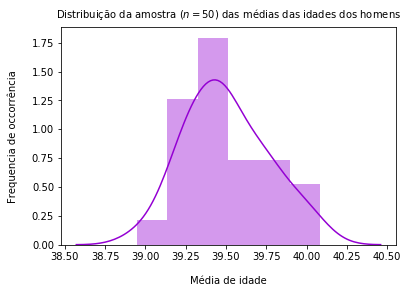

In [103]:
sns.distplot(m_mean_samples, color='darkviolet')
plt.title("Distribuição da amostra ($n=50$) das médias das idades dos homens", y=1.015, fontsize=10)
plt.xlabel("Média de idade", labelpad=14)
plt.ylabel("Frequencia de occorrência", labelpad=14);

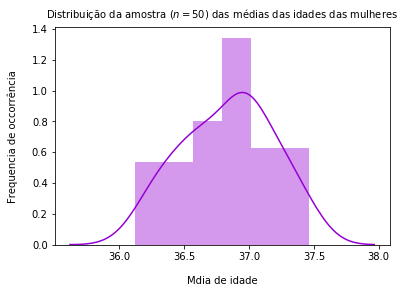

In [104]:
sns.distplot(f_mean_samples, color='darkviolet')
plt.title("Distribuição da amostra ($n=50$) das médias das idades das mulheres", y=1.015, fontsize=10)
plt.xlabel("Mdia de idade", labelpad=14)
plt.ylabel("Frequencia de occorrência", labelpad=14);

Compararando com a média geral de idade da tabela

In [105]:
Xm = format(data['age'].mean(), '.2f')
Sd = format(data['age'].std(), '.2f')

print('Média geral: ', Xm)
print('Desvio padrão geral: ', Sd)

Média geral:  38.58
Desvio padrão geral:  13.64


A formula para obter o escore-Z.

1. $Z = \frac{X - \mu}{{\sigma}}$ 

In [106]:
def calc_escoreZ(x, mi, sigma):
  return (x - mi)/(sigma)

In [107]:
x = 38.58
sigma = 13.64
xi = 39.49

zMale = calc_escoreZ(xi, x, sigma)
print('O escore-z para o homem com 40 anos está cerca de ', zMale)

O escore-z para o homem com 40 anos está cerca de  0.06671554252199441


In [108]:
x = 38.58
sigma = 13.64
xi = 36.72

zFemale = calc_escoreZ(xi, x, sigma)
print('O escore-z para a mulher com 40 anos está cerca de ', zFemale)

O escore-z para a mulher com 40 anos está cerca de  -0.13636363636363633


## <a id='42'>Margem de erro</a>  

Encontrando a margem de erro:

1. $E = z_c \frac{\sigma}{{\sqrt{n}}}$ 

Para um nível de confiança de 95%, a marge de erro para o número médio de idade dos dados é:

In [109]:
# Média geral:  38.58
# Desvio padrão geral:  13.64
print('N: ', len(data))

N:  32561


In [110]:
def calc_margemErro(z, sigma, n):
    return (z)* (sigma/np.sqrt(n))

In [111]:
z = 1.96
sigma = 13.64
n = 32561
margemErro = calc_margemErro(z, sigma, n)
print('margemErro: ', margemErro)

margemErro:  0.14815679498631612


A interpretação é que está 95% de que a margem de erro para a média populacional é de aproximadamente 0.148

## <a id='43'>Construindo um intervalo de confiança</a>  

Sabendo que a média geral é 38.58, o intervalo de confiança é:

In [112]:
mean = 38.58
print('mean+: ', mean + margemErro)
print('mean-: ', mean - margemErro)

mean+:  38.72815679498631
mean-:  38.431843205013685


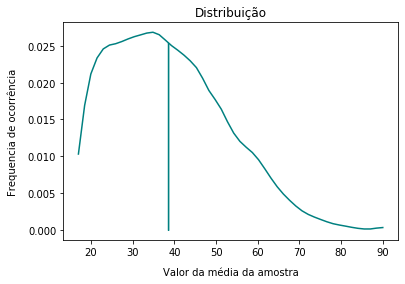

In [113]:
values = dataset['age']

two_std_from_mean = np.mean(values)
kde = stats.gaussian_kde(values)
pos = np.linspace(np.min(values), np.max(values))
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(two_std_from_mean, 38.431843205013685, 38.72815679498631)
plt.fill_between(shade, kde(shade), color='teal')
plt.title("Distribuição")
plt.xlabel("Valor da média da amostra", labelpad=10)
plt.ylabel("Frequencia de ocorrência", labelpad=10);


## <a id='44'>Hypotheses Test </a>  



#### Exemplo 1

Para o primeiro estudo de Hypotheses Test iremos trabalhar utilizando uma população de 1000 valores da coluna age.

In [114]:
print('Tamanho total da base de dados: ', len(data))
smp = np.arange(len(data))
np.random.shuffle(smp)
N = 1000
sub_data = data.loc[smp[:N]]

## Difference mean
Xd = sub_data['age'].mean()
print('Média da população = {}'.format(Xd))
## Difference standard deviation
Sd = sub_data['age'].std()
print('Desvio padrão da população = {}'.format(Sd))

Tamanho total da base de dados:  32561
Média da população = 38.174
Desvio padrão da população = 13.82891763526571


Será utilizado um exemplo para utilizar t-test, utilizado uma amostra de 100 dados.

In [115]:
data_sub = data.sample(100, replace=False)
Xd = data_sub['age'].mean()
print('Média da amostra = {}'.format(Xd))
## Difference standard deviation
Sd = data_sub['age'].std()
print('Desvio padrão da amostra = {}'.format(Sd))

Média da amostra = 38.35
Desvio padrão da amostra = 13.508975691828905


Sabe-se a média geral de idade de 38.73 com desvio padrão de 13.57.

Uma amostra de N = 100 dados deu uma média de 36.65 com 12.57 de desvio padrão. Será testado a hipótese de que a idade média não se alterou contra a alternativa de que se tenha alterado, considerando o nı́vel de significância de 5%.

Primeiro, declaramos a hipótese nula e hipótese alternativa como esta;

- H0: A amostra é da população Adult data set, x_bar = μ.
- HA: A amostra não é da população Adult data set, x_bar! = (Não é igual) μ.

Se essa estatística-z for menor que a crítica-z, aceitamos a hipótese nula; caso contrário, rejeitamos a nula e aceitamos a hipótese alternativa.

1. Parâmetro de interesse: $\mu$
2. $H_0: \mu = 38.731$; $H_a \neq 38.731$
3. Estimador: $\bar{X}$
4. $Z_0 = \frac{\bar{X} - \mu_0}{\frac{\sigma}{\sqrt{n}}}$ 
5. $\alpha = 0,05$
6. $z_c = 1,96$. Rejeitamos $H_0$ se $z_0 < -1.96$ ou $z_0 > 1.96$.
7. $z_0 = \frac{35.28 - 38.433}{\frac{12.5}{\sqrt{100}}} = ?$


In [116]:
def calc_z0(xm, mi, sigma, n):
  return (xm - mi)/(sigma/np.sqrt(n))

def decision_normal(z0, alpha, unilateral=True, right=True):
  p = st.norm.cdf(z0)
  if unilateral:
    if right:
      reject = (p > (1.0 - alpha))
    else:
      reject = (p < alpha)
  else:
    reject = ((p < (alpha/2)) | (p > (1.0 - alpha/2)))

  return reject

In [117]:
mi = 38.73
sigma = 12.5
n = 100
xm = 35.28 
alpha = 0.05

z0 = calc_z0(xm, mi, sigma, n)

In [118]:
print('z0 = ', z0)
p_z0 = stats.norm.cdf(z0)
print('st.norm.cdf = ', p_z0)

reject = decision_normal(z0, alpha, unilateral=False)

if(reject):
  print('H_0 rejeitada')
else:
  print('H_0 não rejeitada')

z0 =  -2.7599999999999967
st.norm.cdf =  0.0028900680762261742
H_0 rejeitada


#### Exemplo 2

In [119]:
points = data['age']
mu = points.mean()
sigma = points.std(ddof=0)
print("mu: ", mu, ", sigma:", sigma)

mu:  38.58164675532078 , sigma: 13.640223092304275


Supondo que uma amostra de N = 100 idades produz uma média amostral de x_bar = 50. Esta amostra é da população de Adult data set? Para testar esta questão, usaremos o que é referido como um teste z de uma amostra. Primeiro, declaramos a hipótese nula e hipótese alternativa como esta;

- H0: A amostra é da população Adult data set, x_bar = μ.
- HA: A amostra não é da população Adult data set, x_bar! = (Não é igual) μ.

Se essa estatística-z for menor que a crítica-z, aceitamos a hipótese nula; caso contrário, rejeitamos a nula e aceitamos a hipótese alternativa

In [120]:
z_critical = 1.96
x_bar = 50
N = 100
SE = sigma/np.sqrt(N)
z_stat = (x_bar - mu)/SE
print(z_stat)

8.371089803598137


#### Exemplo 3 - Utilizando coluna categórica

In [121]:
df_income = data[data['income_cat'] == 1]
p_income = len(df_income)/len(data)
                 
print('A porcentagem da população que possui income >=50k', p_income * 100)

A porcentagem da população que possui income >=50k 24.080955744602438


Afirmação: A proporção da população com income >=50k é maior que 24%.

In [122]:
def calc_t0(xm, mi, s, n):
    return (xm - mi)/(s/np.sqrt(n))

def decision_tstudent(t0, alpha, df, unilateral=True, right=True):
    p = st.t.cdf(t0, df)
    if unilateral:
        if right:
            reject = (p > (1.0 - alpha))
        else:
            reject = (p < alpha)
    else:
        reject = ((p < (alpha/2)) | (p > (1.0 - alpha/2)))

    return reject

n = 20 # tamanho da amostra
gl = n - 1 # graus de liberdade
p_income_sample = np.zeros((n,))

for i in range(20):
    sample = np.arange(len(data))
    np.random.shuffle(sample)

    df_sample = data.loc[sample[:int(20)]]

    df_income_sample = df_sample[df_sample['income_cat'] == 1]

    p_income_sample[i] = len(df_income_sample)/len(df_sample)

s_income_sample = np.std(p_income_sample)

Teste da hipótese

In [123]:
t0 = calc_t0(np.mean(p_income_sample), 0.24, s_income_sample, n)

alpha = 0.05
reject = decision_tstudent(t0, alpha, gl, unilateral=True, right=True)

print(reject)

if(reject):
  print('H_0 rejeitada')
  print('A proporção é maior que 24%')
else:
  print('H_0 não rejeitada')
  print('Não há evidência que a proporção é maior que 24%')

False
H_0 não rejeitada
Não há evidência que a proporção é maior que 24%


# Normal


In [124]:
df_income_sample = data[data['income_cat'] == 1].sample (frac =.10)

n = len(df_income_sample)
xm = df_income_sample['age'].mean()
s = np.std(df_income_sample['age'])
mi = data['age'].mean()

print('Tamanho da amostra: ' + str(n))
print('Média de contatos da amostra: ' + str(xm))
print('Desvio padrão de contatos da amostra: ' + str(s))
print('Média de contatos da população: ' + str(mi))

Tamanho da amostra: 784
Média de contatos da amostra: 44.375
Desvio padrão de contatos da amostra: 10.742091894286984
Média de contatos da população: 38.58164675532078


Verificamos que a média  é de 38.5.

Agora iremos verificar a hipótese de que a média dos incomes é de 44.4, com nível de significância de 0.05.

In [125]:
alpha = 0.05
sigma = s # Como n >= 30 podemos usar a normal

z0 = calc_z0(xm, mi, sigma, n)
reject = decision_normal(z0, alpha, unilateral=False)
if(reject):
  print('H_0 rejeitada')
  print('A média não é de 44.4')
else:
  print('H_0 não rejeitada')
  print('Não há evidência que a média não seja de 44.4')

H_0 rejeitada
A média não é de 44.4
